<a href="https://colab.research.google.com/github/mikislin/summer20-Intro-python/blob/master/08_Pandas_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Perform exploratory data analysis with Pandas on electrophysiological measurements data set
(https://neuroelectro.org/)

use this link to download working file
https://drive.google.com/file/d/1O5wxJweXHO1AK7u91ipLC95_1mZIEG6b/view?usp=sharing

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


**(a)** Load excel-file into DataFrame and getting to know the data set, look at data dimensionality, feature names, and feature types 

In [46]:
df = pd.read_excel('neurophysiology_data.xlsx')

#link = 'https://github.com/mikislin/summer20-Intro-python/raw/master/neurophysiology_data.xlsx'
#df = pd.read_excel(link)

print(df.shape)
print(df.columns)
print(df.info())

(384, 43)
Index(['CellCapacitance', 'InputResistance', 'RestingMembranePotential',
       'MembraneTimeConstant', 'SpikeAmplitude', 'SpikeHalfWidth',
       'SpikeThreshold', 'Rheobase', 'FiringFrequency', 'AhpDuration',
       'CellDiameter', 'AccessResistance', 'SagRatio', 'SpikeOvershoot',
       'CellSurfaceArea', 'AhpAmplitude', 'FiSlope', 'SpontaneousFiringRate',
       'FastAhpAmplitude', 'FastAhpDuration', 'SlowAhpAmplitude',
       'SlowAhpDuration', 'SpikeWidth', 'AdpAmplitude', 'AdpDuration',
       'SpikePeak', 'AdaptationRatio', 'Species', 'Strain', 'ElectrodeType',
       'PrepType', 'JxnPotential', 'JxnOffset', 'Temp', 'Age', 'Weight',
       'NeuronType', 'Title', 'PubYear', 'PubmedLink', 'DataTableLinks',
       'ArticleLink', 'LastAuthor'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  --

**(b)** Select top 5 electrophysiological measurements by non-null counts and create a new dataframe with those measurements accompained with metadata: Species, NeuronType.
* see if there are clear clusters in data with `scatter_matrix() `
* inspect how measurements correlate with each other

In [47]:
data = df[['InputResistance','RestingMembranePotential','MembraneTimeConstant',
           'SpikeAmplitude','SpikeHalfWidth','Species', 'NeuronType']] 

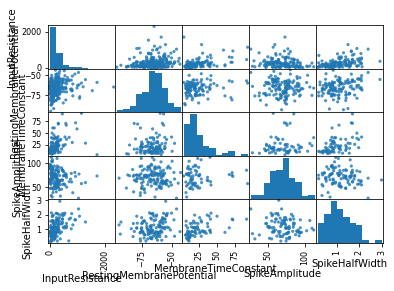

In [ ]:
pd.plotting.scatter_matrix(data, marker='o', s=10, alpha = .8)
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


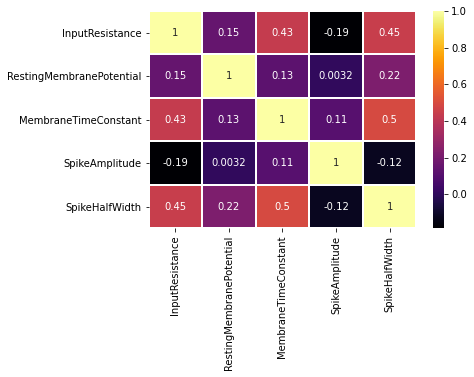

In [ ]:
import seaborn as sns
sns.heatmap(data.corr(),cmap='inferno', linecolor = 'white', linewidths = 1, annot = True)

**(c)** Select neurons that have at least 9 recodrings. Print basic statistical characteristics of each numerical feature per neuron type. Make a bar plots for each feature cross selected above neuron types

In [59]:
recordingsperneuron = data[['InputResistance',
                            'NeuronType']].groupby('NeuronType').count()
recordingsperneuron[recordingsperneuron>=9].dropna()

,InputResistance
NeuronType,
Dentate gyrus granule cell,15.0
Hippocampus CA1 pyramidal cell,31.0
Neocortex basket cell,16.0
Neocortex pyramidal cell layer 2-3,10.0
Neocortex pyramidal cell layer 5-6,15.0
Neostriatum medium spiny neuron,13.0
Olfactory bulb (main) granule cell,10.0
Olfactory bulb (main) mitral cell,16.0
Thalamus relay cell,9.0


In [60]:
recordingsperneuron = data[['InputResistance',
                            'NeuronType']].groupby('NeuronType').count()
idx = recordingsperneuron[recordingsperneuron>=9].dropna().index
idx.values[0]

'Dentate gyrus granule cell'

In [63]:
data1 = data.loc[data['NeuronType'].isin(idx.values)]
data1.sample(10)

,InputResistance,RestingMembranePotential,MembraneTimeConstant,SpikeAmplitude,SpikeHalfWidth,Species,NeuronType
226,86.80,-60.15,16.40,NaN,NaN,Mice,Neocortex pyramidal cell layer 5-6
211,114.36,-68.37,9.09,88.86,0.88,Rats,Neocortex pyramidal cell layer 5-6
54,84.00,-77.00,NaN,73.00,NaN,NaN,Dentate gyrus granule cell
224,144.00,NaN,NaN,NaN,NaN,Rats,Neocortex pyramidal cell layer 5-6
246,121.00,-75.00,13.00,47.00,1.40,Rats,Neostriatum medium spiny neuron
167,269.00,-80.00,37.50,63.40,NaN,Rats,Neocortex basket cell
175,182.00,-67.00,7.70,52.00,0.38,Rats,Neocortex basket cell
369,59.00,-60.00,19.40,NaN,0.50,Rats,Thalamus relay cell
121,108.00,NaN,61.00,NaN,NaN,Rats,Hippocampus CA1 pyramidal cell
291,NaN,-64.30,NaN,NaN,NaN,Rats,Olfactory bulb (main) mitral cell


In [64]:
data1 = data.loc[data['NeuronType'].isin(idx.values)]
data1.groupby('NeuronType').describe()

InputResistance              ... SpikeHalfWidth      
                                             count        mean  ...            75%   max
NeuronType                                                      ...                     
Dentate gyrus granule cell                    15.0  228.113333  ...         1.0925  1.55
Hippocampus CA1 pyramidal cell                31.0   95.638710  ...         1.4400  1.90
Neocortex basket cell                         16.0  148.057500  ...         0.6175  0.85
Neocortex pyramidal cell layer 2-3            10.0  143.230000  ...         1.5600  1.80
Neocortex pyramidal cell layer 5-6            15.0  124.187333  ...         1.6750  1.90
Neostriatum medium spiny neuron               13.0  137.707692  ...         1.4250  1.50
Olfactory bulb (main) granule cell            10.0  728.700000  ...         2.0850  2.09
Olfactory bulb (main) mitral cell             16.0  132.437500  ...         1.8975  1.98
Thalamus relay cell                            9.0  143.066667  ...         0.6500  0.70

[9 rows x 40 columns]

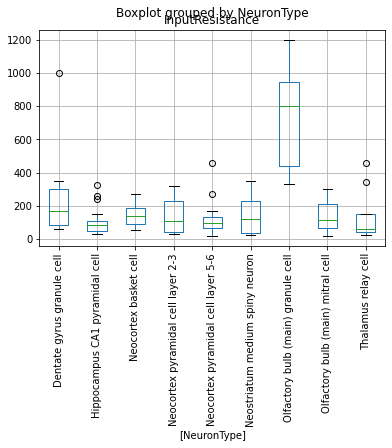

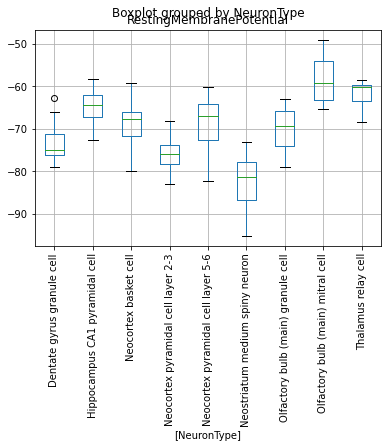

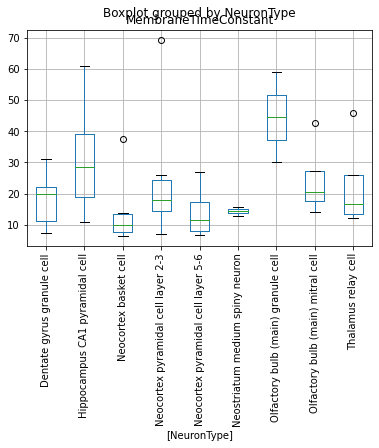

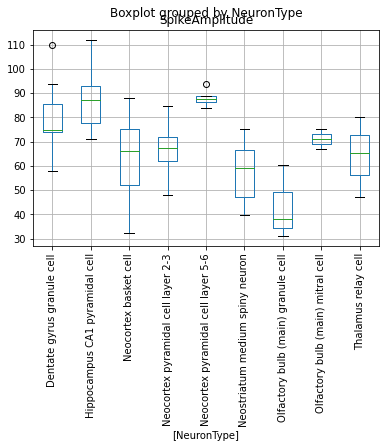

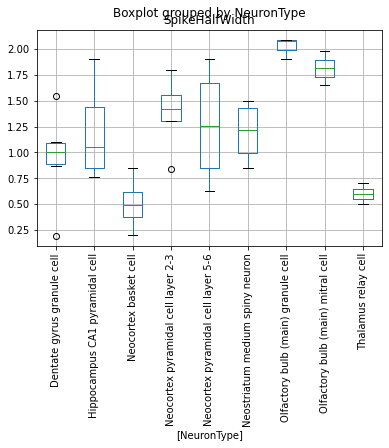

In [65]:
for i in range(5):
  data1.boxplot(column=data1.columns[i],by=['NeuronType'], rot=90)
  plt.show()